In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fraud = pd.read_csv('Fraud_check.csv')

In [3]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [4]:
fraud.drop(["Taxable.Income"],axis=1,inplace=True)
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [5]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [6]:
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]


In [7]:
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.3,stratify = labels)

In [14]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

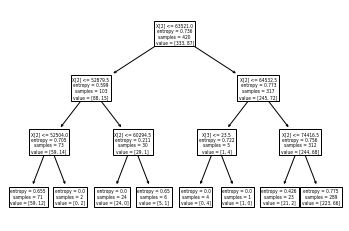

In [15]:
tree.plot_tree(model);

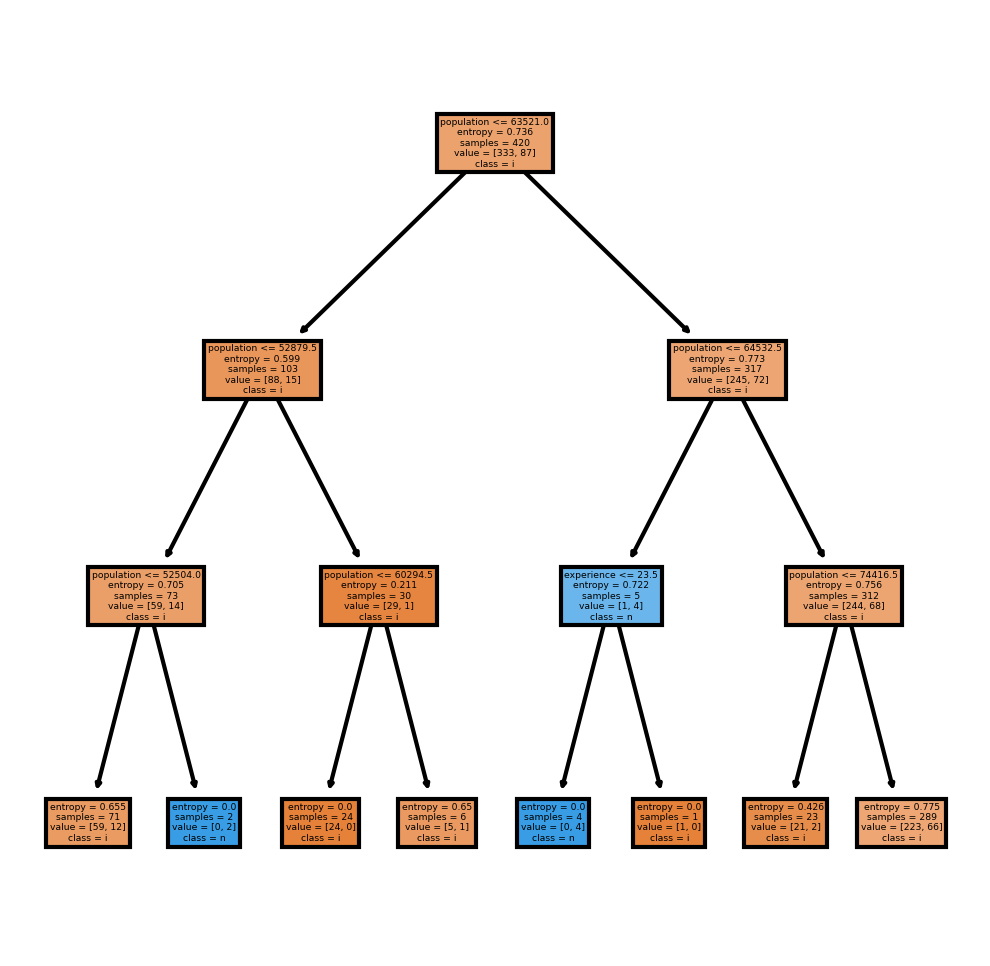

In [18]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = predictors, 
               class_names=target,
               filled = True); 

In [27]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

0    179
1      1
dtype: int64

In [29]:
pd.crosstab(y_test,preds)

col_0,0,1
income,,
0,142,1
1,37,0


In [31]:
#accuracy
np.mean(preds==y_test)


0.7888888888888889